In [1]:
import numpy as np
import matplotlib.pyplot as plt #changed

In [2]:
#Define constants
m = 39.95*1.68*10**(-27)
epsilon = 119.8/1.381*10**(-23)
sigma = 3.405 #angstrom
h = 10**-6 #Timestep

In [88]:
#Particle initial conditions
x_1 = 0.01
y_1 = 3.5
x_2 = 0.1
y_2 = 0.9

vx_1 = 0.1
vy_1 = 0.3
vx_2 = 0.2
vy_2 = 0.1


particle_1 = np.array([x_1, y_1, vx_1, vy_1])
particle_2 = np.array([x_2, y_2, vx_2, vy_2])

[0.01 3.5  0.1  0.3 ]


In [4]:
#Potential function

def r(x,y):
    r_pos = np.sqrt(x**2+y**2)
    return r_pos

def Grad_potential(x_1, y_1, x_2, y_2, epsilon = 119.8/1.381*10**(-23), sigma = 3.405):
    direction = np.array([x_1 - x_2, y_1 - y_2])
    r = np.sqrt((x_1 - x_2)**2+(y_1 - y_2)**2)
    U_partial_r = 4 *epsilon* (12*(sigma)**(12)*(-1/r)**13 - (sigma)**(6)*(-1/r)**7)
    grad_U = U_partial_r * direction *r**(-1)
    return grad_U

In [67]:
print(type(Grad_potential(x_1, y_1, x_2, y_2, epsilon = 119.8/1.381*10**(-23), sigma = 3.405)[0]))
print(type(Grad_potential(x_1, y_1, x_2, y_2, epsilon = 119.8/1.381*10**(-23), sigma = 3.405)))
print(type(np.float64(vx_1)))

print(Grad_potential(x_1, y_1, x_2, y_2))
vx_1new = vx_1 - (Grad_potential(x_1, y_1, x_2, y_2)[0])*h/m
vy_1new = vy_1  - (Grad_potential(x_1, y_1, x_2, y_2)[1])*h/m

x_1new = x_1 + vx_1*h
y_1new = y_1 + vy_1*h
x_2new = x_2 + vx_2*h
y_2new = y_2 + vy_2*h

print(x_1new, y_1new, x_2new, y_2new)

<class 'numpy.float64'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
[ 1.37602112e-20 -3.97517212e-19]
0.0100001 3.5000003 0.10000020000000001 0.9000001


In [117]:
"""
#New
#Loop, old version
time = 1
timesteps = 100
i = 1
x_1_pos = np.array([x_1])
y_1_pos = np.array([y_1])
x_2_pos = np.array([x_2])
y_2_pos = np.array([y_2])
vx_1_pos = np.array([vx_1])
vy_1_pos = np.array([vy_1])
vx_2_pos = np.array([vx_2])
vy_2_pos = np.array([vy_2])

for i in range(timesteps):
    vx_1new = vx_1_pos[-1] - (Grad_potential(x_1_pos[-1], y_1_pos[-1], x_2_pos[-1], y_2_pos[-1])[0])*h/m
    vy_1new = vy_1_pos[-1] - (Grad_potential(x_1_pos[-1], y_1_pos[-1], x_2_pos[-1], y_2_pos[-1])[1])*h/m
    vx_2new = vx_2_pos[-1] - (Grad_potential(x_1_pos[-1], y_1_pos[-1], x_2_pos[-1], y_2_pos[-1])[0])*h/m
    vy_2new = vy_2_pos[-1] - (Grad_potential(x_1_pos[-1], y_1_pos[-1], x_2_pos[-1], y_2_pos[-1])[1])*h/m
    x_1new = x_1_pos[-1] + vx_1_pos[-1]*h
    y_1new = y_1_pos[-1] + vy_1_pos[-1]*h
    x_2new = x_2_pos[-1] + vx_2_pos[-1]*h
    y_2new = y_2_pos[-1] + vy_2_pos[-1]*h
    
    x_1_pos = np.append(x_1_pos, x_1new)
    y_1_pos = np.append(y_1_pos, y_1new)
    x_2_pos = np.append(x_2_pos, x_2new)
    y_2_pos = np.append(y_2_pos, y_2new)
    vx_1_pos = np.append(vx_1_pos, vx_1new)
    vy_1_pos = np.append(vy_1_pos, vy_1new)
    vx_2_pos = np.append(vx_2_pos, vx_2new)
    vy_2_pos = np.append(vy_2_pos, vy_2new)
print((y_2_pos))
"""

'\n#Loop, old version\ntime = 1\ntimesteps = 100\ni = 1\nx_1_pos = np.array([x_1])\ny_1_pos = np.array([y_1])\nx_2_pos = np.array([x_2])\ny_2_pos = np.array([y_2])\nvx_1_pos = np.array([vx_1])\nvy_1_pos = np.array([vy_1])\nvx_2_pos = np.array([vx_2])\nvy_2_pos = np.array([vy_2])\n\nfor i in range(timesteps):\n    vx_1new = vx_1_pos[-1] - (Grad_potential(x_1_pos[-1], y_1_pos[-1], x_2_pos[-1], y_2_pos[-1])[0])*h/m\n    vy_1new = vy_1_pos[-1] - (Grad_potential(x_1_pos[-1], y_1_pos[-1], x_2_pos[-1], y_2_pos[-1])[1])*h/m\n    vx_2new = vx_2_pos[-1] - (Grad_potential(x_1_pos[-1], y_1_pos[-1], x_2_pos[-1], y_2_pos[-1])[0])*h/m\n    vy_2new = vy_2_pos[-1] - (Grad_potential(x_1_pos[-1], y_1_pos[-1], x_2_pos[-1], y_2_pos[-1])[1])*h/m\n    x_1new = x_1_pos[-1] + vx_1_pos[-1]*h\n    y_1new = y_1_pos[-1] + vy_1_pos[-1]*h\n    x_2new = x_2_pos[-1] + vx_2_pos[-1]*h\n    y_2new = y_2_pos[-1] + vy_2_pos[-1]*h\n    \n    x_1_pos = np.append(x_1_pos, x_1new)\n    y_1_pos = np.append(y_1_pos, y_1new)\n   

In [116]:
#New
#Same, but compact

#Put initial values in 2D arrays

part_1  = np.array([[x_1],[y_1],[vx_1],[vy_1]]) #starting position and velocity for particle 1
#print(type(part_1))
part_2  = np.array([[x_2],[y_2],[vx_2],[vy_2]]) #starting position and velocity for particle 2
#print(part_1[0,-1])

#Now loop 100 times over the functions to get the new positions and velocities
timesteps = 100

for i in range(timesteps):
    #The constants don't have to be declared again in the Grad_potential function
    vx_1new = part_1[2,-1] - (Grad_potential(part_1[0,-1], part_1[1,-1], part_2[0,-1], part_2[1,-1])[0])*h/m
    vy_1new = part_1[3,-1] - (Grad_potential(part_1[0,-1], part_1[1,-1], part_2[0,-1], part_2[1,-1])[1])*h/m
    vx_2new = part_2[2,-1] - (Grad_potential(part_1[0,-1], part_1[1,-1], part_2[0,-1], part_2[1,-1])[0])*h/m
    vy_2new = part_2[3,-1] - (Grad_potential(part_1[0,-1], part_1[1,-1], part_2[0,-1], part_2[1,-1])[1])*h/m
    x_1new = part_1[0,-1] + part_1[2,-1]*h
    y_1new = part_1[1,-1] + part_1[3,-1]*h
    x_2new = part_2[0,-1] + part_2[2,-1]*h
    y_2new = part_2[1,-1] + part_2[3,-1]*h
    
    #add the new values for the x,y positions and velocities to the arrays for particles 1 and 2
    part_1_new = np.array([[x_1new],[y_1new], [vx_1new],[vy_1new]])
    part_1 = np.append(part_1, part_1_new, axis = 1)
    
    part_2_new = np.array([[x_2new],[y_2new], [vx_2new],[vy_2new]])
    part_2 = np.append(part_2, part_2_new, axis = 1)
    
#print(part_2)

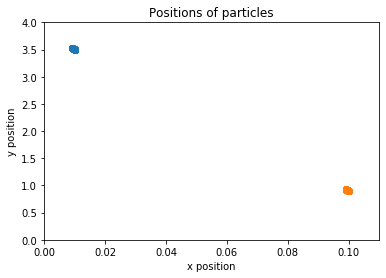

In [113]:
#New
#Scatter plot
plt.scatter(part_1[0], part_1[1])
plt.scatter(part_2[0], part_2[1])
plt.title("Positions of particles")
plt.xlabel("x position")
plt.ylabel("y position")
plt.xlim(0.0, 0.11)
plt.ylim(0, 4)
plt.show()